In [1]:
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import netCDF4
sns.set()
def f_2_m(f,R=0):
    # Meter til Fot
    if R:
        return 3.2808399*f

    # Fot til Meter
    else:
        return 0.3048*f
    
def m_2_f(m,R=0):
    if R:
        return 0.3048*m
    else:
        return 3.2808399*m

outsource = "../Thesis_source/MasterThesis/Figures/"


In [2]:
ds = pd.read_csv("source/dataset_H.csv",index_col = 0)
helilist =[]
for i, row in ds.iterrows():
    if row[-1] == "H":
        helilist.append(i)
    if not row[-3] > 0:
        print(row[4])
        ds = ds.drop(i)

In [3]:
dsS = ds.copy()
dsW = ds.copy()
for i, row in ds.iterrows():
    month = int(str(row[0])[4:-2])
    # Definer vinterhalvåret som Oktober-Mars, sommer som April til September
    if month < 4 or month > 9:
        dsS=dsS.drop(i)
    else:
        dsW=dsW.drop(i)                
                

In [4]:
HTI_cases = dsW.copy()

In [5]:
def C(K):
    return round(K - 273.15,2)

In [6]:
ands = pd.read_csv("source/analysis_dataset_new.csv")
ands

,date,time,place1,place2,height,temp,type
0,20120422,20,ENUS,ENBN,3000.0,NaN,H
1,20121230,13,ENBN,NaN,NaN,0.0,H
2,20130208,19,ENSE,ENFL,3000.0,NaN,H
3,20130318,20,ENZV,Offshore,2000.0,NaN,H
4,20130503,7,ENBR,ENQA,2000.0,NaN,H
5,20131221,16,ENZV,Offshore,NaN,NaN,H
6,20141209,16,ENXA,ENZV,7000.0,-2.0,H
7,20151113,13,ENUC,ENKB,3000.0,NaN,H
8,20151127,13,ENUC,ENKB,3000.0,NaN,H
9,20171123,17,ENXA,ENZV,3000.0,1.0,H


In [7]:
flesland_coord = (60.291,5.222)
sola_coord = (58.878,5.632)
gardermoen_coord = (60.199,11.100)

def distanse(start,slutt):
    """
    Regner ut distansen fra start-koordinatene (2-tuple)
    til slutt-koordinatene (2-tuple)
    og returnerer denne (1 float)
    """
    x1,y1 = start
    x2,y2 = slutt
    dist = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    return dist



In [8]:
H = []
FW_summer =[]
FW_winter = []
for DS in [ds,ands]:
    for i, row in DS.iterrows():
        height = row[-3]
        if height > 0:
            height = f_2_m(height)
            month = int(str(row[0])[4:-2])
            if row[-1] == "H":
                H.append(height)
            else:
                if month > 5 and month < 9:
                    FW_summer.append(height)
                else:
                    FW_winter.append(height)


In [9]:
binsM = np.linspace(0,5000,11)
binsF = np.linspace(0,16000,17)

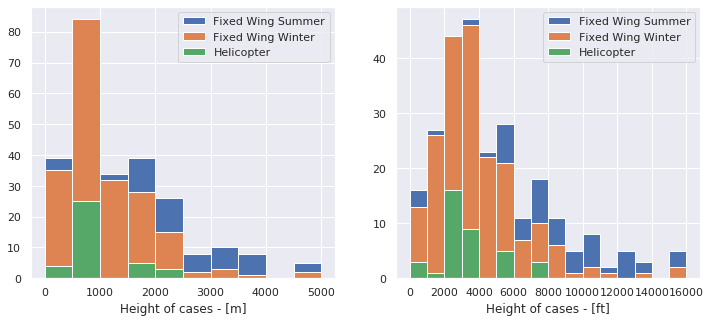

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(H+FW_summer+FW_winter,binsM, label= "Fixed Wing Summer")
ax1.hist(H+FW_winter,binsM,label="Fixed Wing Winter")
ax1.hist(H,binsM,label="Helicopter")
ax1.legend()
ax1.set_xlabel("Height of cases - [m]")

ax2.hist(list(map(m_2_f,H+FW_summer+FW_winter)),binsF, label= "Fixed Wing Summer")
ax2.hist(list(map(m_2_f,H+FW_winter)),binsF,label="Fixed Wing Winter")
ax2.hist(list(map(m_2_f,H)),binsF, label="Helicopter")
ax2.legend()
ax2.set_xlabel("Height of cases - [ft]")
fig.savefig(outsource+"height.pdf")

In [19]:
heightlist = [[] for _ in range(12)]
gardermoen = []
sola = []
flesland = []
cutoff = 1
dates = {}
for i, row in ds.iterrows():
    month_index= int(str(row[0])[4:-2])-1
    lat = row[4]
    lon = row[5]
    event_coords = (lat,lon)
    height = row[6]
    if height > 0:
        heightlist[month_index].append(height)
        if distanse(event_coords,flesland_coord) < cutoff:
            flesland.append(i)
        elif distanse(event_coords,sola_coord) < cutoff:
            sola.append(i)
        elif distanse(event_coords,gardermoen_coord) < cutoff:
            gardermoen.append(i)
    dates[row[0]] = 1
nr = 0
for i in heightlist:
    nr += len(i)
print(nr)


240


In [11]:
unique_coords = []
for i, row in ds.iterrows():
    lat = round(row[4],2)
    lon = round(row[5],2)
    event_coords = (lat,lon)
    if event_coords not in unique_coords:
        unique_coords.append(event_coords)
print(len(unique_coords))
with open("unique_coords.txt","w") as outfile:
    for coords in unique_coords:
        outfile.write(str(coords[0]) +","+str(coords[1])+"\n")

56


## These Cell uses Era5 PL and SL

In [33]:
ds

,date,time,place1,place2,lat,lon,height,temp,type
0,20080205,7,ENBR,NaN,60.291,5.222,2499.992,NaN,FW
1,20080213,17,ENAT,NaN,69.980,23.360,13000.000,NaN,FW
2,20080222,8,ENFL,NaN,61.390,5.020,3800.000,NaN,FW
3,20080404,18,ENBR,NaN,60.291,5.220,3000.000,NaN,FW
6,20080715,12,ENTC,NaN,69.680,18.920,10000.000,NaN,FW
...,...,...,...,...,...,...,...,...,...
272,20180925,15,ENBO,NaN,67.270,14.350,3500.000,NaN,FW
274,20181008,2,ENOL,NaN,63.700,9.604,3200.000,NaN,FW
275,20181030,21,ENZV,NaN,59.350,6.017,8000.000,NaN,FW
276,20181130,18,ENBR,NaN,60.291,5.222,6000.000,NaN,FW


## Difference between PL and ML

In [101]:
def f_2_m(f,R=0):
    # Meter til Fot
    if R:
        return 3.2808399*f

    # Fot til Meter
    else:
        return 0.3048*f
    
def estimate_pl(geopotential_pl,case_height):
    mean_height_pl = f_2_m(geopotential_pl.mean(axis=1).mean(axis=1)/9.81,1)
    dist = mean_height_pl - case_height
    return int(np.argmin(abs(dist)).values)

def get_height_value_from_pl(geopotential_pl,variable_pl,height=750,pmax=0,pmin=1):
    # pmax is index of levellist [975,950,925,900,875,850,825,800], if longer, geopotential is longer.
    # Also Assume 9.81 is correct gravitational constant ( should be to 1%)
    z2,z1 = geopotential_pl.isel(level=pmin)/9.81 , geopotential_pl.isel(level=pmax)/9.81
    v2,v1 = variable_pl.isel(level=pmin) , variable_pl.isel(level=pmax)
    variableperheight = (v2-v1)/(z2-z1)
    result = v1 + variableperheight*(height - z1)
    return result

def w_from_omega(omega,P,T,mix):
    eps = 0.622
    R_d = 287.058 
    T_v = T*((mix + eps)/(eps*(1+mix)))
    rho = P/ (R_d*T_v)
    return (-omega)/(rho*9.81)


date      20080213
time            17
place1        ENAT
place2         NaN
lat          69.98
lon          23.36
height       13000
temp           NaN
type            FW
Name: 1, dtype: object
73
251
252
253
date      20180817
time            18
place1        ESSA
place2         NaN
lat         59.985
lon         21.441
height       18000
temp           NaN
type            FW
Name: 265, dtype: object
-1.3131268138276264


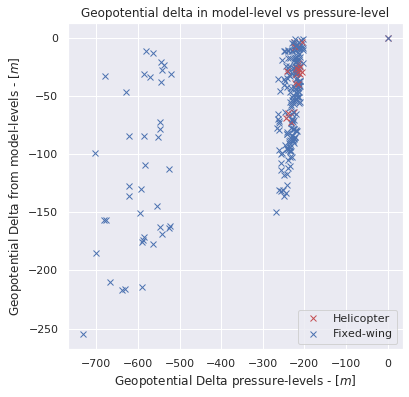

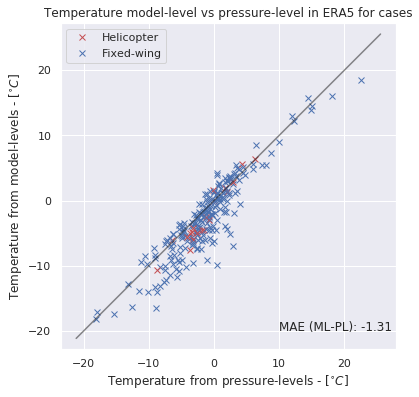

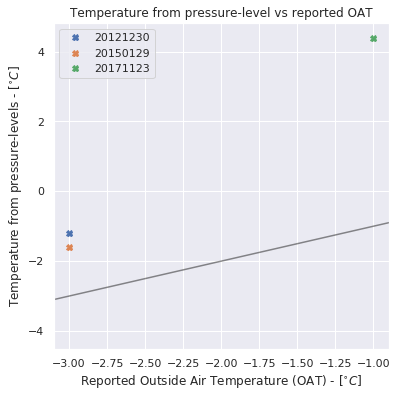

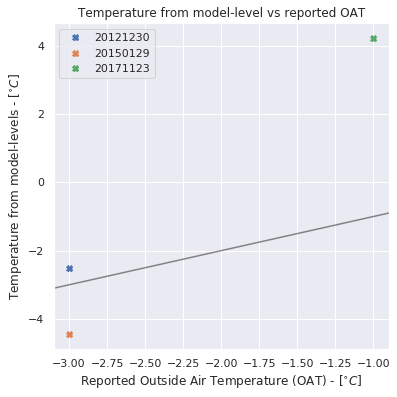

In [116]:
import lib.gpcalc as gpc
f0  = plt.figure(figsize = (6,6))
f1  = plt.figure(figsize = (6,6))
f2  = plt.figure(figsize=(6,6))
f3  = plt.figure(figsize=(6,6))

ax0 = f0.gca()
ax1 = f1.gca()
ax2 = f2.gca()
ax3 = f3.gca()


templist = [[] for _ in range(12)]
templistflat_new = []
k_list =[]

path = "source_disk/era5/event_data/"
folder = "source_disk/era5/specific_patterns/"
last = ""
nr=0

ax0.plot(0,0,"xr")
ax0.plot(0,0,"xb")
ax0.legend(["Helicopter","Fixed-wing"])

ax1.plot(0,0,"xr")
ax1.plot(0,0,"xb")
ax1.legend(["Helicopter","Fixed-wing"])

mldf = pd.read_csv('table.csv',index_col='n')
MAE = 0
N=0
for i, row in ds.iterrows():
    date = row[0]
    month_index= int(str(date)[4:-2])-1
    lat = row[4]
    lon = row[5]
    time = row[1]
    event_coords = (lat,lon)
    height = row[6]
    
    if not height > 0:
        templistflat_new.append(np.nan)
        k_list.append(np.nan)
        continue
    try:
        data = xr.open_dataset(path+str(date)+str(time)+str(int(round(lat,0)))+str(int(round(lon,0)))+'ModelLevel.nc')
    except:
        print(i)
        continue
        
    gpc.set_data(data, mldf, 137)
    
    k = -1
    sfx = gpc.get_phi(137)/9.81
    for j in range(136,97,-1):
        if f_2_m(gpc.get_phi(j)[0,2,2]/9.81,1) - f_2_m(sfx[0,2,2],1) - height > 0:
            k = j
            break

    if k == -1:
        print(row)
        templistflat_new.append(np.nan)
        k_list.append(np.nan)
        continue
        
    
    # Define lapse_rate from difference (Tk - Tk-1)/(Zk - Zk-1) (must be k and k + 1 since 136 is lowest level) T per meter. faen
    lapse_rate = (data.sel(level=k)['t'][0,2,2]-data.sel(level=k+1)['t'][0,2,2])/(gpc.get_phi(k)[0,2,2]/9.81 - gpc.get_phi(k+1)[0,2,2]/9.81)
    # Gives distance between layers in feet. (m**2/s**2 / (m/s**2)) converted to feet.
    distance = f_2_m((f_2_m(gpc.get_phi(k+1)[0,2,2]/9.81,1) - f_2_m(sfx[0,2,2],1) - height))
                                                                                  
    # Temperature from level we know we have passed, times the distance to "real" level.                                                                            
    temp = ((data.sel(level=k+1)['t'][0,2,2] - 273.15) + lapse_rate * distance ).values
    nr +=1

    xarray = xr.open_dataset(folder+"%i%2.2i.nc"%(row[0],row[1])).isel(time=0)
    ind = estimate_pl(xarray["z"],height)
    part = xarray["msl"]/100
    
    dist = xarray["z"].isel(level=ind)/9.81 - xarray["z"].isel(level=ind+1)/9.81
    dist = dist.sel(latitude=lat ,method = "nearest").sel(longitude=lon,method="nearest")
    
    T750 = get_height_value_from_pl(xarray["z"],xarray["t"],height=f_2_m(height),pmax=ind,pmin=ind+1)-273.1 
    T750 = T750.sel(latitude=lat ,method = "nearest").sel(longitude=lon,method="nearest")
    
    MAE += temp - T750
    if abs(row[-2]) + 1 > 0:
        ax2.plot(row[-2],T750,"X",label=str(row[0]))
        ax3.plot(row[-2],temp,"X",label=str(row[0]))
    if temp < -30:
        print(row)
        templistflat_new.append(temp)
        k_list.append(k)
        continue
        
    if row[-1] == "H":
        ax0.plot(dist,distance, "xr")
        ax1.plot(T750,temp,"xr")
        
    else:
        ax0.plot(dist,distance, "xb")
        ax1.plot(T750,temp, "xb")
    N += 1
    k_list.append(k)
    templistflat_new.append(temp)
    templist[month_index].append(temp)
    
ax0.set_title("Geopotential delta in model-level vs pressure-level")
ax0.set_xlabel("Geopotential Delta pressure-levels - $[m]$")
ax0.set_ylabel("Geopotential Delta from model-levels - $[m]$")

ax1.set_title("Temperature model-level vs pressure-level in ERA5 for cases")
ax1.set_xlabel("Temperature from pressure-levels - $[^{\circ}C]$")
ax1.set_ylabel("Temperature from model-levels - $[^{\circ}C]$")

ax2.set_title("Temperature from pressure-level vs reported OAT")
ax2.set_xlabel("Reported Outside Air Temperature (OAT) - $[^{\circ}C]$")
ax2.set_ylabel("Temperature from pressure-levels - $[^{\circ}C]$")

ax3.set_title("Temperature from model-level vs reported OAT")
ax3.set_xlabel("Reported Outside Air Temperature (OAT) - $[^{\circ}C]$")
ax3.set_ylabel("Temperature from model-levels - $[^{\circ}C]$")

for ax in [ax1,ax2,ax3]:
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.plot(np.linspace(xlim[0]-1,xlim[1]+1),np.linspace(xlim[0]-1,xlim[1]+1),"k",alpha = 0.5)
    ax.set_xlim(xlim)

ax1.set_ylim(xlim)
ax1.axis("equal")

ax2.legend()    
ax3.legend()
print((MAE/N).values)
ax1.text(10,-20,"MAD (ML-PL): "+str(np.round((MAE/N).values,2)))
f0.savefig(outsource+"geopot.pdf")
f1.savefig(outsource+"mlvspl.pdf")
f2.savefig(outsource+"plvsoat.pdf")
f3.savefig(outsource+"mlvsoat.pdf")




In [49]:
bar = np.linspace(-23,19,43)
height = np.zeros(len(bar),dtype = int)
height2 = np.zeros(len(bar),dtype=int)
for j,temp in enumerate(templistflat_new):
    if np.isnan(temp):
        continue
    i = np.argmin(abs(bar-temp))
    height[i] +=1
    if j in helilist:
        height2[i] +=1

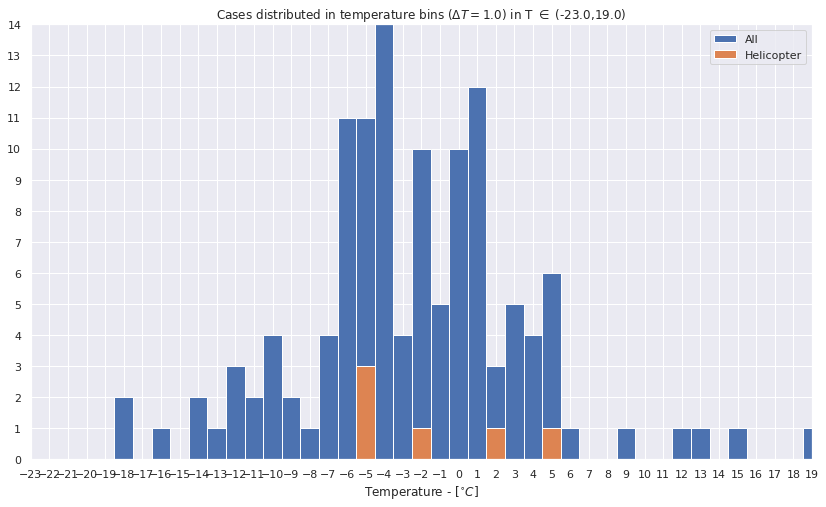

6


In [51]:
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.grid()
ax.bar(bar,height,width=1,label ="All")
ax.bar(bar,height2,width=1, label ="Helicopter")
plt.xticks(range(int(min(bar)),int(max(bar))+1,1))
plt.yticks(range(int(min(height)),int(max(height))+1,1))

plt.xlim((int(min(bar)),int(max(bar))))
plt.ylim(0,max(height))
plt.xlabel(r"Temperature - [$^{\circ}C$]")
dt = (max(bar)-min(bar))/(len(bar)-1)
plt.title("Cases distributed in temperature bins ($\Delta T = %.1f$) in T $\in$ (%.1f,%.1f)"%(dt,min(bar),max(bar)))
plt.legend()
plt.grid(True)
plt.show()

print(sum(height2))

In [76]:
bar = np.linspace(-20,20,9)
height = np.zeros(len(bar),dtype = int)
height2 = np.zeros(len(bar),dtype=int)
for j,temp in enumerate(templistflat_new):
    if np.isnan(temp) or j == 263:
        continue
    i = np.argmin(abs(bar-temp))
    height[i] +=1
    if j in helilist:
        height2[i] +=1

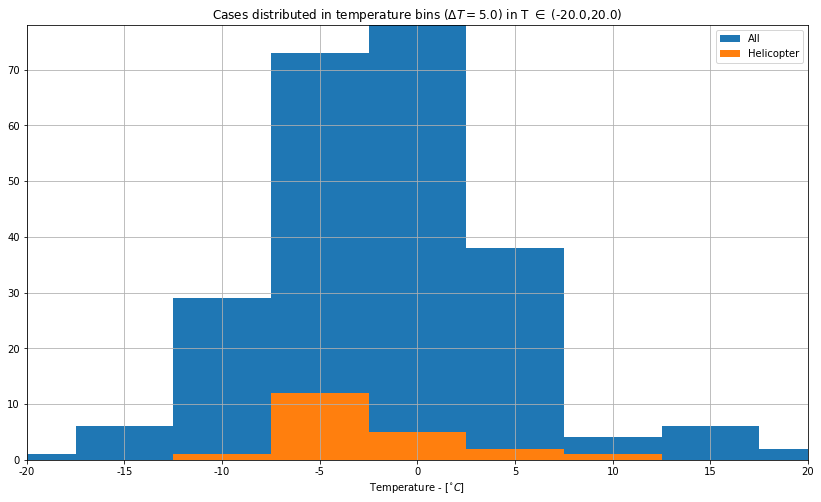

237


In [85]:
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.grid()
ax.bar(bar,height,width=5,label ="All")
ax.bar(bar,height2,width=5, label ="Helicopter")
plt.xticks(range(int(min(bar)),int(max(bar))+1,5),range(int(min(bar)),int(max(bar))+1,5))

plt.xlim((int(min(bar)),int(max(bar))))
plt.ylim(0,max(height))
plt.xlabel(r"Temperature - [$^{\circ}C$]")
dt = (max(bar)-min(bar))/(len(bar)-1)
plt.title("Cases distributed in temperature bins ($\Delta T = %.1f$) in T $\in$ (%.1f,%.1f)"%(dt,min(bar),max(bar)))
plt.legend()
plt.grid(True)
plt.show()

print(sum(height))

In [11]:
helicopter_cases = np.zeros(12,dtype=int)
fixed_wing_cases = np.zeros(12,dtype=int)
H_variation = np.zeros(12,dtype=int)
FW_variation =np.zeros(12,dtype=int)

for i, row in ds.iterrows():
    year_index= int(str(row[0])[:4])-2008
    month_index= int(str(row[0])[4:-2])-1
    if month_index > 5:
        year_index+=1
    if row[-1] == "H":
        helicopter_cases[month_index] +=1 
        H_variation[year_index] += 1
    else:
        fixed_wing_cases[month_index] += 1
        FW_variation[year_index] += 1

for i, row in ands.iterrows():
    year_index= int(str(row[0])[:4])-2008
    month_index= int(str(row[0])[4:-2])-1
    if month_index > 6:
        year_index+=1
    helicopter_cases[month_index] +=1
    H_variation[year_index] += 1
print(sum(H_variation))

xlist =  
season_list = []
for i in range(7,19):
    season_list.append("%2.2d/%2.2d"%(i,i+1))

plt.figure(figsize=(14,8))
ax = plt.axes()
ax.bar(range(1,13),helicopter_cases,color="c",label="Helicopter")
ax.legend(loc="best",fontsize=15)
plt.yticks(range(0,max(helicopter_cases)+1))
plt.xticks(range(1,13),xlist)
plt.grid()

plt.figure(figsize=(14,8))
ax = plt.axes()

ax.bar(range(1,13),fixed_wing_cases+helicopter_cases,label="Fixed wing")
ax.bar(range(1,13),helicopter_cases,color="c",label="Helicopter")
ax.legend(loc="best",fontsize=15)
plt.yticks(range(0,max(fixed_wing_cases)+max(helicopter_cases)+1,5))
plt.xticks(range(1,13),xlist)
plt.grid()


plt.figure(figsize=(14,8))
ax = plt.axes()

ax.bar(range(1,13),FW_variation+H_variation,label="Fixed wing")
ax.bar(range(1,13),H_variation,color="c",label="Helicopter")
plt.xticks(range(1,13),season_list)

ax.legend(loc="best",fontsize=15)
plt.grid()


plt.show()

SyntaxError: invalid syntax (<ipython-input-11-9341eed9e5be>, line 27)

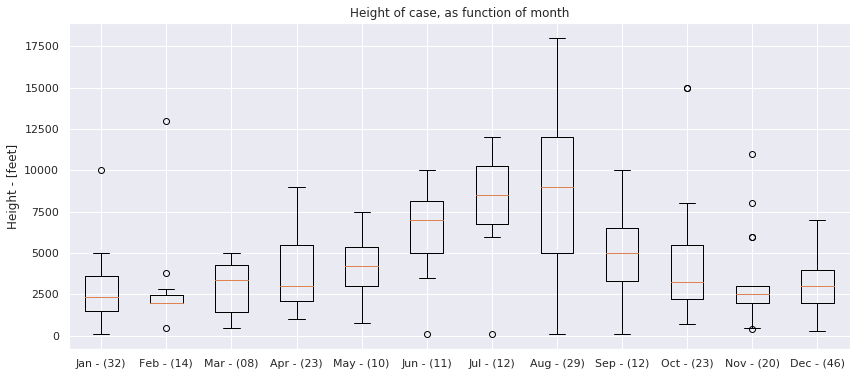

In [18]:
plt.figure(figsize=(14,6))
ax = plt.axes()
ax.boxplot(heightlist)

xlist = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
for i,list_ in enumerate(heightlist):
    xlist[i] = xlist[i] + " - (%2.2d)"%len(list_)

plt.xticks(range(1,len(xlist)+1),xlist)
plt.grid(1)
plt.ylabel("Height - [feet]")
plt.title("Height of case, as function of month")
plt.show()


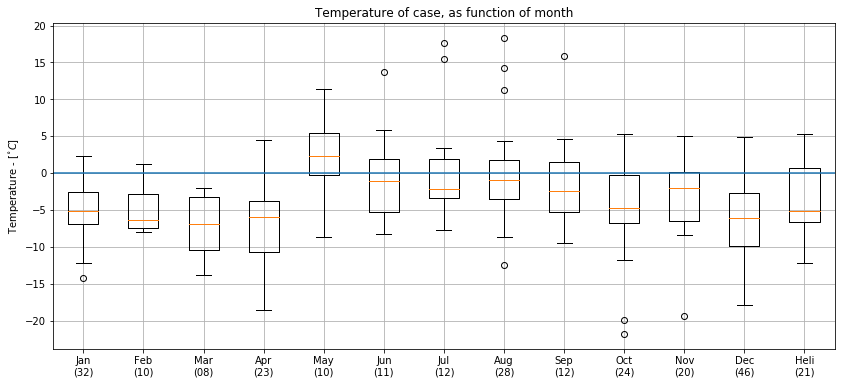

In [26]:
plt.figure(figsize=(14,6))
ax = plt.axes()
ax.boxplot(templist)
xlist = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Heli"]
for i,list_ in enumerate(templist):
    xlist[i] = xlist[i] + "\n(%2.2d)"%len(list_)

ax.plot(range(0,15),np.zeros(15))
nr = 0

plt.xticks(range(1,14),xlist)
plt.ylabel(r"Temperature - [$^{\circ}C$]")
plt.grid()
plt.title("Temperature of case, as function of month")

plt.show()

In [9]:


height_at_airports = [[] for _ in range(3)]
temp_at_airports = [[] for _ in range(3)]
for i,row in ds.iterrows():
    if i in flesland:
        height_at_airports[0].append(row[4])
        temp_at_airports[0].append(templistflat[i])
    elif i in sola:
        height_at_airports[1].append(row[4])
        temp_at_airports[1].append(templistflat[i])
    elif i in gardermoen:
        height_at_airports[2].append(row[4])
        temp_at_airports[2].append(templistflat[i])
        
xlist = ["Flesland","Sola","Gardermoen"]
for i,list_ in enumerate(height_at_airports ):
    xlist[i] = xlist[i] + " - (%2.2d)"%len(list_)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.boxplot(height_at_airports)
ax1.set_title("Variation in height")
ax1.set_ylabel("Height - [feet]")
ax1.set_xticks(range(1,4),xlist)
ax1.set_xticklabels(xlist)
ax1.grid()
ax2.boxplot(temp_at_airports )
ax2.set_ylabel(r"Temperature - [$^{\circ}C$]")
ax2.set_title("Variation in temperature")
ax2.set_xticks(range(1,4))
ax2.set_xticklabels(xlist)
ax2.grid()
ax2.plot(range(5),np.zeros(5))
plt.show()


NameError: name 'templistflat' is not defined

116 162


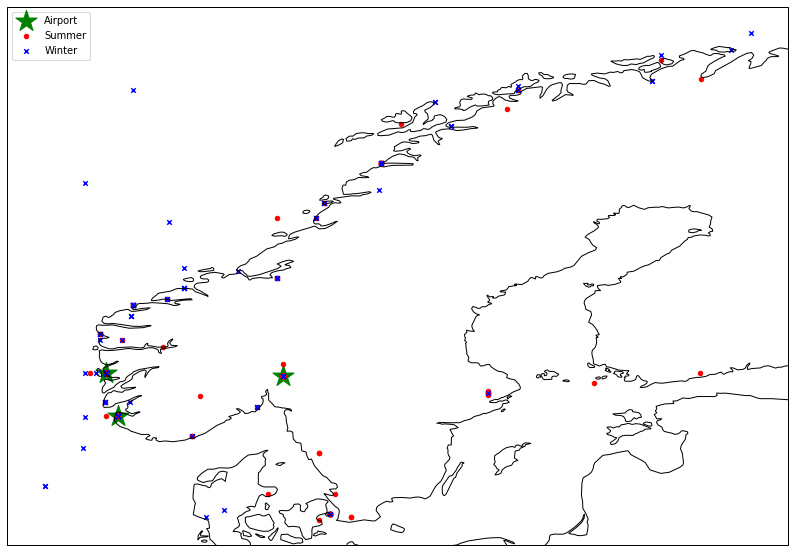

In [240]:
fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection=ccrs.PlateCarree())


ax.scatter(5.222,60.291,500,"g","*",transform=ccrs.PlateCarree(),label="Airport")
ax.scatter(11.1,60.199,500,"g","*",transform=ccrs.PlateCarree())
ax.scatter(5.632,58.878,500,"g","*",transform=ccrs.PlateCarree())

dsS.plot(ax=ax ,c="r",x="lon",y="lat",kind="scatter",transform=ccrs.PlateCarree(),label="Summer")
dsW.plot(ax=ax ,marker="x",c="b",x="lon",y="lat",kind="scatter",transform=ccrs.PlateCarree(),label="Winter")

ax.coastlines("50m")
ax.legend()
print(len(dsS),len(dsW))